In [0]:
#Importing libraries
from google.colab import drive
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd
from scipy.stats import zscore
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from termcolor import colored, cprint
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore
import collections
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.feature_selection import RFE

In [0]:
#Mounting the drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Reading the datasets
En_data = pd.read_csv("/content/drive/My Drive/energy_dataset.csv")
Wt_dat = pd.read_csv("/content/drive/My Drive/weather_features.csv")


# Merging Data


We have 2 data sets - Energy and Weather. We have merged both these datasets to see the results for overall solar energy generation in Spain for 3 years.

In [0]:
Wt_dat.rename(columns={'dt_iso':'time'},inplace = True)
grouped_weather_data = Wt_dat.groupby(['time']).mean()
wt_en_data = pd.merge(grouped_weather_data, En_data, on='time', how='outer')
wt_en_data = wt_en_data.dropna(axis = 1, how = 'all')
data = wt_en_data

# Analysis

In [0]:
data.columns

Index(['time', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all',
       'weather_id', 'generation biomass',
       'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind onshore day ahead', 'total load forecast',
       'total load actual', 'price day ahead', 'price actual'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

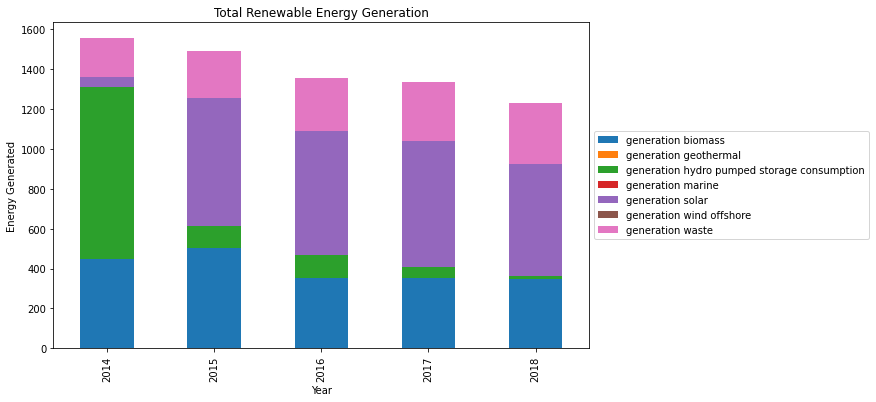

In [0]:
pltdf = data.copy()
pltdf['time'] = pd.to_datetime(pltdf['time'], utc=True, infer_datetime_format=True)
plotdf15 = pltdf.groupby(pltdf["time"].dt.year)['generation biomass','generation geothermal','generation hydro pumped storage consumption','generation marine','generation solar','generation wind offshore','generation waste'].median()
plotdf15.head(10)
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
#ax = plt.subplot(111)

ax = plotdf15.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Total Renewable Energy Generation")
plt.xlabel("Year")
plt.ylabel("Energy Generated")

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Text(0, 0.5, 'Energy Generated')

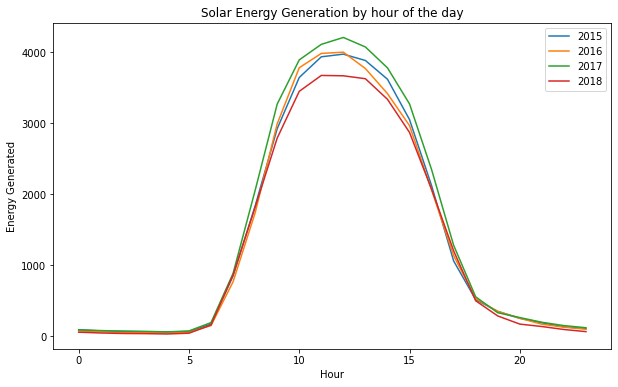

In [0]:
energydaily = data.copy()
energydaily['time'] = pd.to_datetime(energydaily['time'], utc=True, infer_datetime_format=True)
energy2015=energydaily[energydaily.time.dt.year == 2015]
energy2016=energydaily[energydaily.time.dt.year == 2016]
energy2017=energydaily[energydaily.time.dt.year == 2017]
energy2018=energydaily[energydaily.time.dt.year == 2018]
plotdf15 = energy2015.groupby(energy2015["time"].dt.hour)['generation solar'].median().reset_index() #We take median and not mean because of the outliers
plotdf16 = energy2016.groupby(energy2016["time"].dt.hour)['generation solar'].median().reset_index() #We take median and not mean because of the outliers
plotdf17 = energy2017.groupby(energy2017["time"].dt.hour)['generation solar'].median().reset_index() #We take median and not mean because of the outliers
plotdf18 = energy2018.groupby(energy2018["time"].dt.hour)['generation solar'].median().reset_index() #We take median and not mean because of the outliers
ax = plotdf15.plot(y='generation solar',title='Solar Energy Generation by hour of the day',x_compat=True,figsize=(10,6),label='2015')
plotdf16.plot(y='generation solar',x_compat=True,ax=ax,label='2016')
plotdf17.plot(y='generation solar',x_compat=True,ax=ax,label='2017')
plotdf18.plot(y='generation solar',x_compat=True,ax=ax,label='2018')
ax.set_xlabel("Hour")
ax.set_ylabel("Energy Generated")

Text(0, 0.5, 'Energy Generation')

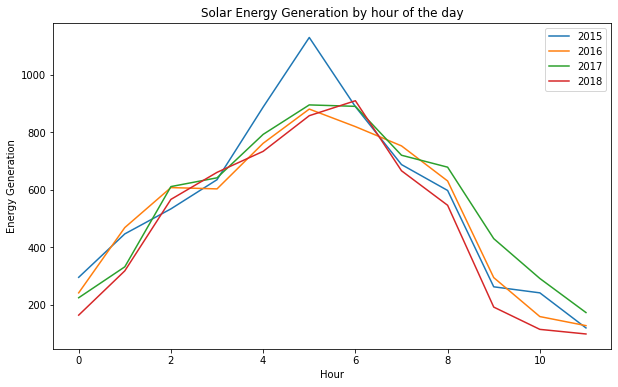

In [0]:
energydaily = data.copy()
energydaily['time'] = pd.to_datetime(energydaily['time'], utc=True, infer_datetime_format=True)
energy2015=energydaily[energydaily.time.dt.year == 2015]
energy2016=energydaily[energydaily.time.dt.year == 2016]
energy2017=energydaily[energydaily.time.dt.year == 2017]
energy2018=energydaily[energydaily.time.dt.year == 2018]
plotdf15 = energy2015.groupby(energy2015["time"].dt.month)['generation solar'].median().reset_index() #We take median and not mean because of the outliers
plotdf16 = energy2016.groupby(energy2016["time"].dt.month)['generation solar'].median().reset_index() #We take median and not mean because of the outliers
plotdf17 = energy2017.groupby(energy2017["time"].dt.month)['generation solar'].median().reset_index() #We take median and not mean because of the outliers
plotdf18 = energy2018.groupby(energy2018["time"].dt.month)['generation solar'].median().reset_index() #We take median and not mean because of the outliers
ax = plotdf15.plot(y='generation solar',title='Solar Energy Generation by hour of the day',x_compat=True,figsize=(10,6),label='2015')
plotdf16.plot(y='generation solar',x_compat=True,ax=ax,label='2016')
plotdf17.plot(y='generation solar',x_compat=True,ax=ax,label='2017')
plotdf18.plot(y='generation solar',x_compat=True,ax=ax,label='2018')
ax.set_xlabel("Hour")
ax.set_ylabel("Energy Generation")

In [0]:
corr_data = data[['time', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all',
       'weather_id', 'generation biomass',
       'generation fossil brown coal/lignite', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil','generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir','generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste','forecast solar day ahead',
       'forecast wind onshore day ahead', 'total load forecast',
       'total load actual', 'price day ahead', 'price actual']]
corr = corr_data.corr(method='pearson')
corr


,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
temp,1.000000,0.987921,0.985426,-0.023196,-0.674630,0.100628,-0.115236,-0.079628,-0.006729,-0.076923,-0.215047,0.199424,0.034369,0.067211,0.110591,0.083062,0.106387,-0.224127,-0.102945,-0.016848,-0.031138,-0.036223,0.006131,0.423435,0.092368,0.426249,-0.140317,0.201507,0.203435,0.070386,0.080356
temp_min,0.987921,1.000000,0.948895,-0.020708,-0.671655,0.099931,-0.110661,-0.076988,0.006493,-0.069789,-0.204996,0.188493,0.024792,0.065292,0.117493,0.078188,0.104004,-0.226241,-0.092806,-0.023809,-0.040500,-0.042827,0.030246,0.419877,0.102050,0.422476,-0.133011,0.201938,0.203680,0.084635,0.093519
temp_max,0.985426,0.948895,1.000000,-0.025520,-0.656198,0.090485,-0.122896,-0.082730,-0.021103,-0.083760,-0.222671,0.208045,0.037749,0.068500,0.099717,0.084137,0.102305,-0.217802,-0.111314,-0.006487,-0.020599,-0.031107,-0.018288,0.420622,0.081505,0.423883,-0.148573,0.196230,0.198476,0.050874,0.061787
pressure,-0.023196,-0.020708,-0.025520,1.000000,-0.005309,0.015279,0.033004,0.048162,-0.002400,-0.001260,0.020061,-0.019300,0.014672,-0.021202,-0.016169,-0.021115,-0.006517,0.018138,0.014232,0.022117,0.020335,0.022671,-0.020644,-0.006915,-0.029103,-0.006800,0.022859,-0.002001,-0.002187,-0.022172,-0.016237
humidity,-0.674630,-0.671655,-0.656198,-0.005309,1.000000,-0.341188,0.020164,0.104490,0.007972,-0.004017,0.319001,-0.293131,-0.028976,0.013265,-0.100672,-0.032954,-0.135466,0.201577,-0.025228,-0.089944,0.020120,0.016668,-0.026008,-0.580597,-0.000964,-0.577001,-0.037547,-0.366562,-0.366030,-0.040554,-0.039439
wind_speed,0.100628,0.099931,0.090485,0.015279,-0.341188,1.000000,0.361267,0.182795,-0.020161,0.060860,0.283796,-0.202650,-0.033682,-0.148313,-0.090790,-0.136938,-0.016463,0.045822,0.160786,0.110118,0.021404,-0.015509,-0.020776,0.212021,-0.076806,0.212657,0.323544,0.193291,0.194898,-0.124252,-0.225336
wind_deg,-0.115236,-0.110661,-0.122896,0.033004,0.020164,0.361267,1.000000,0.084949,0.007046,0.045820,0.118165,-0.095390,0.033642,-0.147171,-0.150440,-0.131389,-0.041984,0.137122,0.108602,0.023924,0.007852,0.039943,-0.095487,-0.100938,-0.102052,-0.105249,0.192051,-0.081775,-0.085577,-0.161827,-0.203741
rain_1h,-0.079628,-0.076988,-0.082730,0.048162,0.104490,0.182795,0.084949,1.000000,0.004972,0.076483,0.328181,-0.559986,0.053435,-0.090064,-0.073310,-0.054349,0.009669,0.015948,0.076705,0.070653,0.044376,0.052669,-0.100167,-0.026761,-0.154331,-0.026080,0.124678,0.019504,0.020922,-0.073932,-0.072874
rain_3h,-0.006729,0.006493,-0.021103,-0.002400,0.007972,-0.020161,0.007046,0.004972,1.000000,-0.002880,0.027317,-0.009247,0.083721,-0.006357,-0.036307,0.020847,0.040404,-0.002181,0.009134,0.023509,-0.008460,0.064697,-0.103283,0.004022,-0.094478,0.004558,0.000834,-0.005817,-0.006749,-0.031873,-0.020192
snow_3h,-0.076923,-0.069789,-0.083760,-0.001260,-0.004017,0.060860,0.045820,0.076483,-0.002880,1.000000,0.054441,-0.046572,0.031150,-0.015284,-0.022268,-0.005179,0.002746,-0.013587,0.034050,0.022379,-0.012909,0.016605,-0.064954,0.023170,-0.074451,0.019103,-0.001825,-0.010118,-0.009964,-0.005068,0.014884


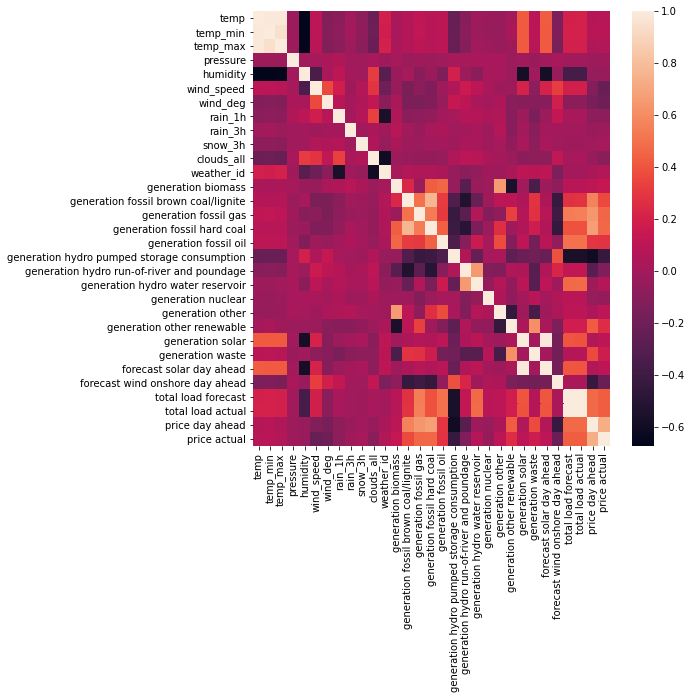

In [0]:
#Heat map
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(corr)

# Splitting Test and Train data

Based on the correlation coefficient calculated above, we selected the following features (in cols) to split the test and train data and eventually calculate the solar forecast.

In [0]:
cols = ['time','temp','temp_min', 'temp_max','humidity', 'wind_speed', 'wind_deg','weather_id','generation fossil oil',
        'generation hydro pumped storage consumption','generation hydro water reservoir', 
        'generation wind onshore', 'forecast wind onshore day ahead',
       'total load forecast','total load actual','price actual','forecast solar day ahead','generation solar']
wt_en_data = wt_en_data[cols]
wt_en_data = wt_en_data.dropna()
# data = wt_en_data
wt_en_data = wt_en_data[list(wt_en_data.columns)[1:]].apply(zscore)
X = wt_en_data[list(wt_en_data.columns)[1:-1]]
y = wt_en_data[list(wt_en_data.columns)[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Support Vector Machines

In [0]:
from sklearn.metrics import mean_squared_error
import math
model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("Root Mean Square Value is -->", rmse)

Root Mean Square Value is --> 0.3095901118591323


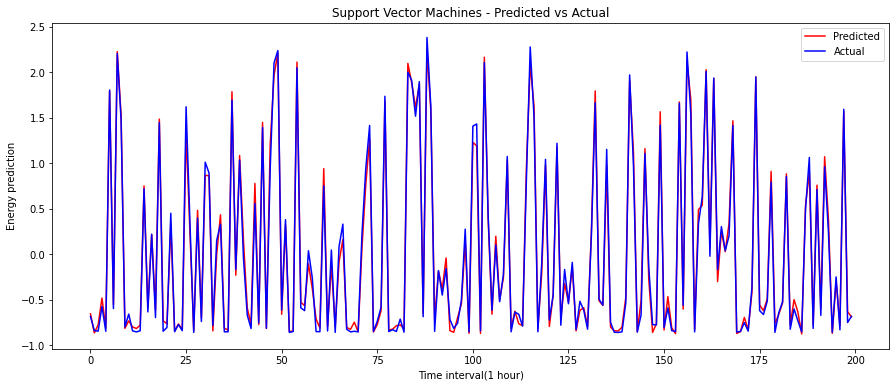

In [0]:
time=np.arange(200)
pred = pd.DataFrame(data=y_pred)
test = pd.DataFrame(data=y_test)
plt.figure(figsize=(15,6))
plt.plot(time, pred.iloc[0:200], color='red',label='Predicted')
plt.plot(time, test.iloc[0:200], color='blue',label='Actual')
plt.xlabel('Time interval(1 hour)')
plt.ylabel('Energy prediction')
plt.title('Support Vector Machines - Predicted vs Actual')
plt.legend()

In [0]:
# SVM_error_dict = collections.defaultdict()
# for C in [0.1,0.5,1,10,50,100,200]:
#     for eps in [0.1,0.5,1,10,50,100,200]:
#         model = LinearSVR(C=C, epsilon=eps)
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)
#         mean_abs_error = mean_absolute_error(y_test, y_pred)
#         SVM_error_dict[str(C)+"-"+str(eps)] = mean_abs_error
#         print(mean_abs_error, C, eps)

No handles with labels found to put in legend.


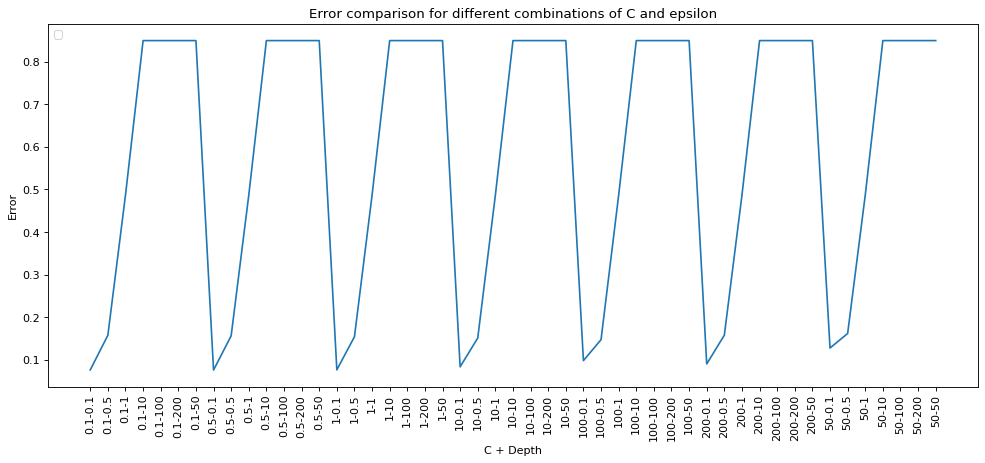

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
lists = sorted(SVM_error_dict.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.title('Error comparison for different combinations of C and epsilon')
plt.xlabel('C + Depth')
plt.ylabel('Error')
plt.xticks(rotation = 90)
plt.legend(loc = 'upper left')
plt.show()

In [0]:
key_list = list(SVM_error_dict.keys()) 
val_list = list(SVM_error_dict.values()) 
key_list[val_list.index(min(SVM_error_dict.values()))]

'0.5-0.1'

The lowest error value for SVM model is 0.075448 for C = 0.5 and epsilon = 0.1.

# RFE (Recursive Feature Elimination)

In order to improve the performance of SVM, we used Recursive Feature Elimination method to find the best combination of the features, thus giving the least error. 

For every iteration, it picks top 'i' features and measure the predicted solar forecast values for only the selected 'i' features. This helped us to find the the number of the features to be used to fetch the best solar prediction value.

In [0]:
model = LinearSVR()

In [0]:
multi_svm_dict = collections.defaultdict()
for C in [0.1,0.5,1,10,50,100,200]:
    for eps in [0.1,0.5,1,10,50,100,200]:
        for n_fet in range(1,17):
            model = LinearSVR(C=C, epsilon=eps)
            rfe = RFE(model, n_fet)
            fit = rfe.fit(X_train, y_train)
            y_pred = fit.predict(X_test)
            err = mean_absolute_error(y_test, y_pred)
            multi_svm_dict[str(C)+"-"+str(eps)+"-"+str(n_fet)] = err 
            print(err,C, eps, n_fet)

In [0]:
X = multi_svm_dict.keys()
Y = multi_svm_dict.values()
i = Y.index(min(multi_svm_dict.values()))
print(min(multi_svm_dict.values()))
print(X[i])


# Random Forest Regression

In [0]:
random_error_dict = collections.defaultdict()
for n_est in [10,20,30,40,50,60,70,80,90,100]:
    for max_d in [5,10,15,20,25,30,35,40]:
      regression_model = RandomForestRegressor(n_estimators = n_est,max_depth=max_d, max_features='auto')
      # fitting training data #
      regression_model.fit(X_train, y_train)
      y_pred = regression_model.predict(X_test)
      # function to compute Root Mean Square Error.
      mse = mean_squared_error(y_test, y_pred)
      rmse = math.sqrt(mse)
      random_error_dict[str(n_est) + "-" + str(max_depth)] = rmse
      print("Root Mean Sqaure Error ->", rmse,"for estimators = ", n_est,"and depth = ", max_d)



Root Mean Sqaure Error -> 0.11729997192506923 for estimators =  10 and depth =  5
Root Mean Sqaure Error -> 0.11494321203805653 for estimators =  10 and depth =  10
Root Mean Sqaure Error -> 0.11603175801623634 for estimators =  10 and depth =  15
Root Mean Sqaure Error -> 0.11644863497443658 for estimators =  10 and depth =  20
Root Mean Sqaure Error -> 0.11711833683258711 for estimators =  10 and depth =  25
Root Mean Sqaure Error -> 0.11692797629389368 for estimators =  10 and depth =  30
Root Mean Sqaure Error -> 0.11746190609912166 for estimators =  10 and depth =  35
Root Mean Sqaure Error -> 0.1170455963100666 for estimators =  10 and depth =  40
Root Mean Sqaure Error -> 0.11713085774450326 for estimators =  20 and depth =  5
Root Mean Sqaure Error -> 0.11385401805149709 for estimators =  20 and depth =  10
Root Mean Sqaure Error -> 0.11418895270679465 for estimators =  20 and depth =  15
Root Mean Sqaure Error -> 0.11410777193563927 for estimators =  20 and depth =  20
Root Me

In [0]:
key_list = list(random_error_dict.keys()) 
val_list = list(random_error_dict.values()) 
z = key_list[val_list.index(min(random_error_dict.values()))]
print(z,min(random_error_dict.values()))

80-35 0.11202446860767268


In [0]:
regression_model = RandomForestRegressor(n_estimators = 80,max_depth=35, max_features='auto')
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)

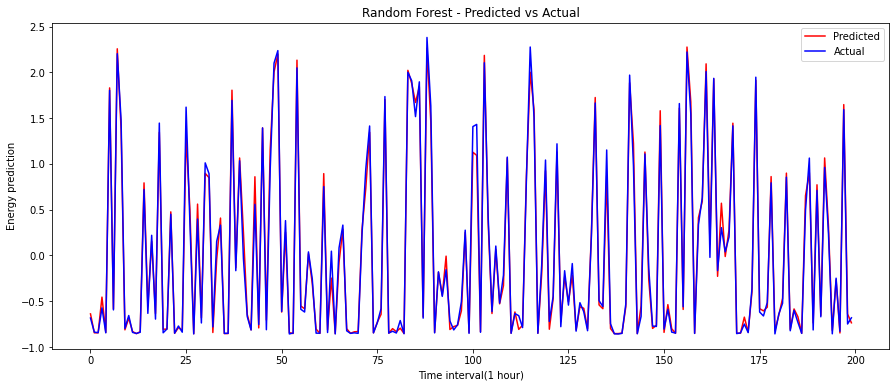

In [0]:
time=np.arange(200)
pred = pd.DataFrame(data=y_pred)
test = pd.DataFrame(data=y_test)
plt.figure(figsize=(15,6))
plt.plot(time, pred.iloc[0:200], color='red',label='Predicted')
plt.plot(time, test.iloc[0:200], color='blue',label='Actual')
plt.xlabel('Time interval(1 hour)')
plt.ylabel('Energy prediction')
plt.title('Random Forest - Predicted vs Actual')
plt.legend()

No handles with labels found to put in legend.


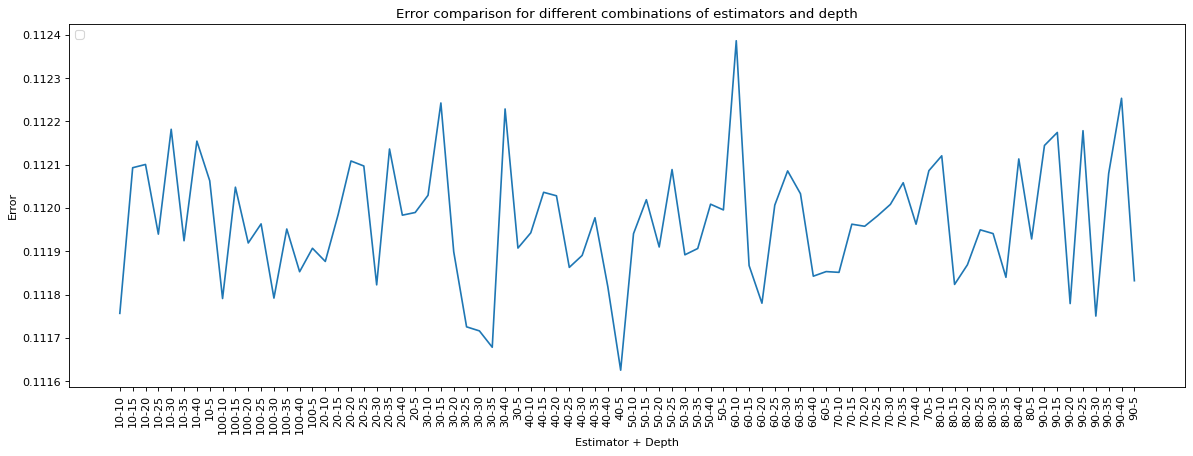

In [0]:
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
lists = sorted(random_error_dict.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
# plt.show()
# plt.plot(random_error_dict.keys(), random_error_dict.values(), linewidth=2, color="g", label="Energy Demand")
plt.title('Error comparison for different combinations of estimators and depth')
plt.xlabel('Estimator + Depth')
plt.ylabel('Error')
plt.xticks(rotation = 90)
# yticks(x,rotation='vertical')
plt.legend(loc = 'upper left')
plt.show()

Thus it is clear from the graph that the lowest error for random forest regression is 0.067515 for no of estimators = 30 and depth = 20.


# SARIMA

In [0]:
df1 = wt_en_data['generation solar']
train_hour = df1.iloc[0:int(0.8*df1.shape[0])] #0.8*35064
test_hour = df1.iloc[int(0.8*df1.shape[0]):]
fit = sm.tsa.statespace.SARIMAX(train_hour, trend=[1,1,1,1]).fit()
y_pred = fit.predict(start=int(0.8*df1.shape[0])+1, end=df1.shape[0], dynamic=True)
# mae_hour = mean_absolute_error(test_hour, y_predicted)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(rmse)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


0.116086290029345


# Linear Regression

In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). 

In [0]:
from sklearn.linear_model import LinearRegression
import math
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [0]:
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(rmse)

0.11730393327431794


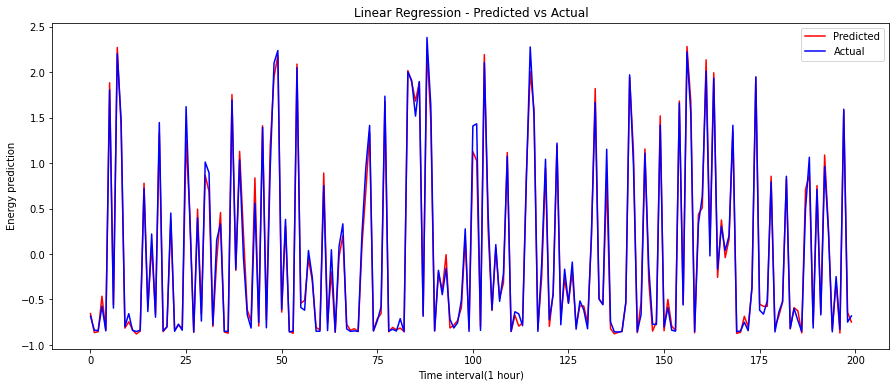

In [0]:
time=np.arange(200)
pred = pd.DataFrame(data=y_pred)
test = pd.DataFrame(data=y_test)
plt.figure(figsize=(15,6))
plt.plot(time, pred.iloc[0:200], color='red',label='Predicted')
plt.plot(time, test.iloc[0:200], color='blue',label='Actual')
plt.xlabel('Time interval(1 hour)')
plt.ylabel('Energy prediction')
plt.title('Linear Regression - Predicted vs Actual')
plt.legend()

# Gradient Boosting Regression

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
# Best results on a lesser learning rate and n_est = 100, max_depth = 10
Boosting_dict = collections.defaultdict()
for n_est in [10,20,30,40,50]:
    for max_depth in [10,15,20,25,30,50,100]:
        for l_rate in [0.0001, 0.001, 0.1, 1]:
            regression_model = GradientBoostingRegressor(n_estimators = n_est, max_depth=max_depth, learning_rate=l_rate)
            # fitting training data #
            regression_model.fit(X_train, y_train)
            y_pred = regression_model.predict(X_test)

            # function to compute mean absolute error.
            mse = mean_squared_error(y_test, y_pred)
            rmse = math.sqrt(mse)
            Boosting_dict[str(n_est)+"-"+str(max_depth)+"-"+str(l_rate)] = rmse
            print("Root Mean Square Error is ->", rmse, n_est, max_depth, l_rate)

Root Mean Square Error is -> 0.9996840445531592 10 10 0.0001
Root Mean Square Error is -> 0.9908298397422519 10 10 0.001
Root Mean Square Error is -> 0.36431816584925664 10 10 0.1
Root Mean Square Error is -> 0.1370671810531267 10 10 1
Root Mean Square Error is -> 0.9996848560172332 10 15 0.0001
Root Mean Square Error is -> 0.990836382362814 10 15 0.001
Root Mean Square Error is -> 0.3650349253655837 10 15 0.1
Root Mean Square Error is -> 0.1550211654539322 10 15 1
Root Mean Square Error is -> 0.999686307607976 10 20 0.0001
Root Mean Square Error is -> 0.9908506611500825 10 20 0.001
Root Mean Square Error is -> 0.3689466786791734 10 20 0.1
Root Mean Square Error is -> 0.1549688350188439 10 20 1
Root Mean Square Error is -> 0.9996862824857476 10 25 0.0001
Root Mean Square Error is -> 0.9908532807761401 10 25 0.001
Root Mean Square Error is -> 0.37081809037366903 10 25 0.1
Root Mean Square Error is -> 0.15730023410208044 10 25 1
Root Mean Square Error is -> 0.9996859459512253 10 30 0.000

In [0]:
X = list(Boosting_dict.keys())
Y = list(Boosting_dict.values())
i = Y.index(min(Boosting_dict.values()))
print(min(Boosting_dict.values()))
print(X[i])

0.11067414525531342
50-10-0.1


In [0]:
regression_model = GradientBoostingRegressor(n_estimators = 50, max_depth=10, learning_rate=0.1)
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)


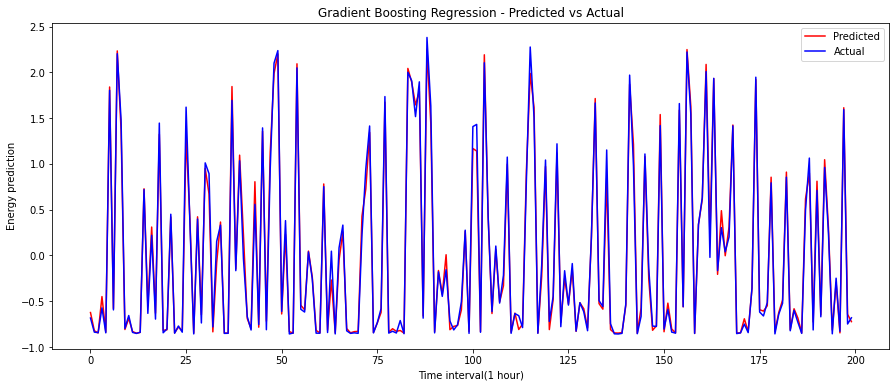

In [0]:
time=np.arange(200)
pred = pd.DataFrame(data=y_pred)
test = pd.DataFrame(data=y_test)
plt.figure(figsize=(15,6))
plt.plot(time, pred.iloc[0:200], color='red',label='Predicted')
plt.plot(time, test.iloc[0:200], color='blue',label='Actual')
plt.xlabel('Time interval(1 hour)')
plt.ylabel('Energy prediction')
plt.title('Gradient Boosting Regression - Predicted vs Actual')
plt.legend()

The best error value(lowest) is 0.11067414525531342 for 
50 estimators 10 depth and 0.1 learning rate.

No handles with labels found to put in legend.


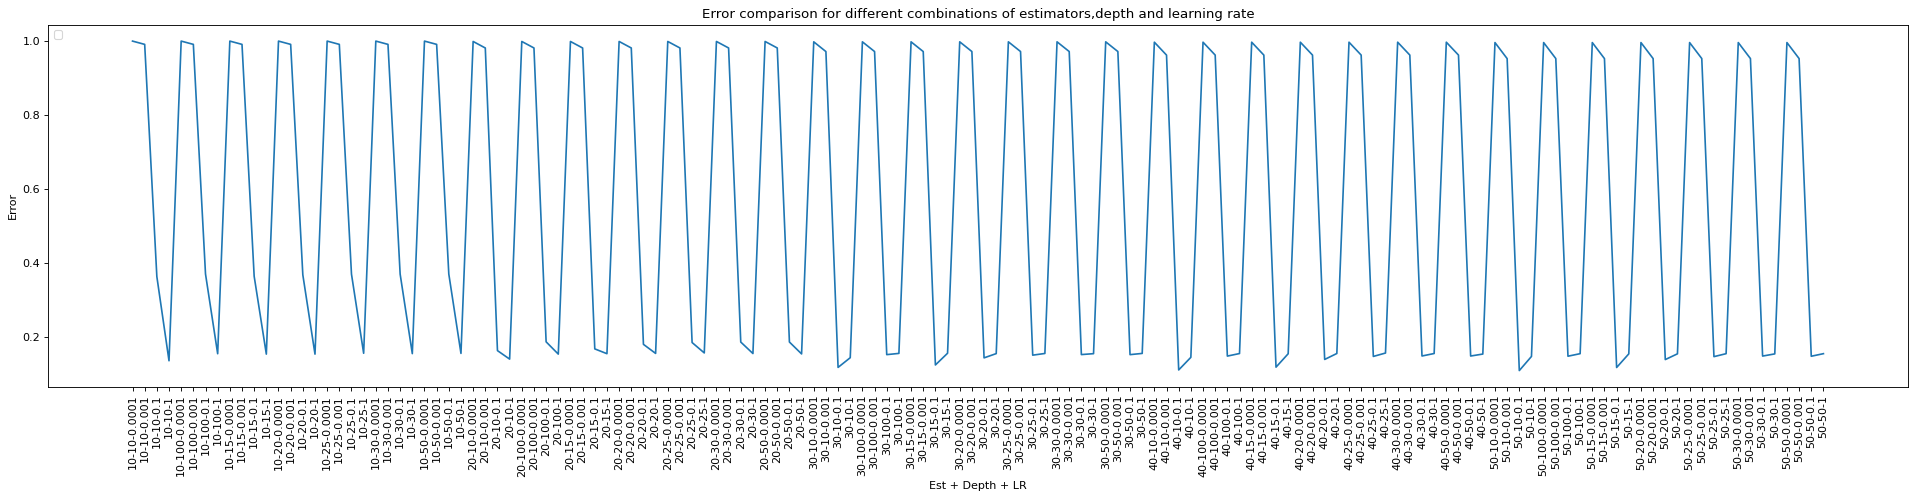

In [0]:
figure(num=None, figsize=(30, 6), dpi=80, facecolor='w', edgecolor='k')
lists = sorted(Boosting_dict.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.title('Error comparison for different combinations of estimators,depth and learning rate')
plt.xlabel('Est + Depth + LR')
plt.ylabel('Error')
plt.xticks(rotation = 90)
plt.legend(loc = 'upper left')
plt.show()

**Learning Rate** 
The above results show that small learning rates (such as nu < 0.1) yields dramatic improvements in models' generalization ability over gradient boosting without shrinking (nu = 1).

However, it comes at the price of increasing computational time both during training and querying: lower learning rate requires more iterations.

**Depth**
 comment that typically 4 <= J <= 8 work well for boosting and results are fairly insensitive to the choice of J in this range. Usually J = 2 is insufficient for many applications, and J > 10 is unlikely to be required.



# Summary

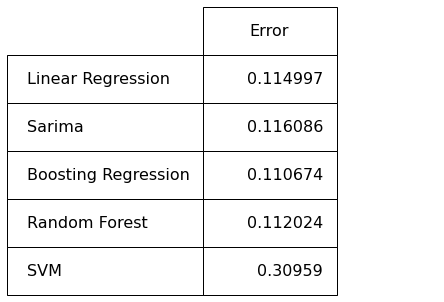

In [0]:
# create a summary table

row_labels = ['Linear Regression', 'Sarima','Boosting Regression','Random Forest','SVM']
# 'Linear Regression(Daily)','Linear Regression(Hourly)','Random Forest(Hourly)','Random Forest(Daily)']
col_labels = ['Error']
table_vals = [[0.114997],
              [0.116086],
              [0.110674],
              [0.112024], 
              [0.309590]]

# # Draw table
the_table = plt.table(cellText=table_vals, colWidths=[0.1] * 3, rowLabels=row_labels,colLabels=col_labels,loc='center')
the_table.set_fontsize(16)
the_table.scale(4, 4)
# to hide the x and y axis labels and ticks.
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)

# to hide the graph box border in the backgroud.
for position in ['right','top','bottom','left']:
    plt.gca().spines[position].set_visible(False)

In [0]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true+0.00000000001))) * 100
    print(mean_absolute_percentage_error(y_test, y_pred))


# Predictions with data before and after Noon

In [0]:
# night_data = night_data[cols]
# night_data = night_data.dropna()
# day_data = day_data[cols]
# day_data = day_data.dropna()
# day_data = wt_en_data[wt_en_data['generation solar'] > 500]
# night_data = wt_en_data[wt_en_data['generation solar'] <= 500]

# Removing Outliers

In [0]:
# X = X_filter[((X_filter > -3)&(X_filter < 3)).all(axis=1)]
# y = y_filter[((X_filter > -3)&(X_filter < 3)).all(axis=1)]